<a href="https://colab.research.google.com/github/srikar963/FMML_Projects_and_Labs/blob/main/AIML_Module_4_Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [8]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [9]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [10]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

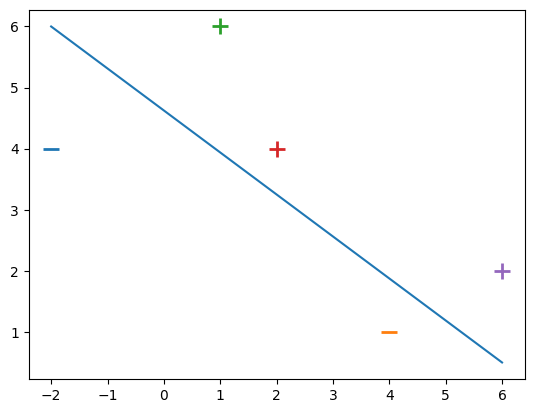

In [11]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

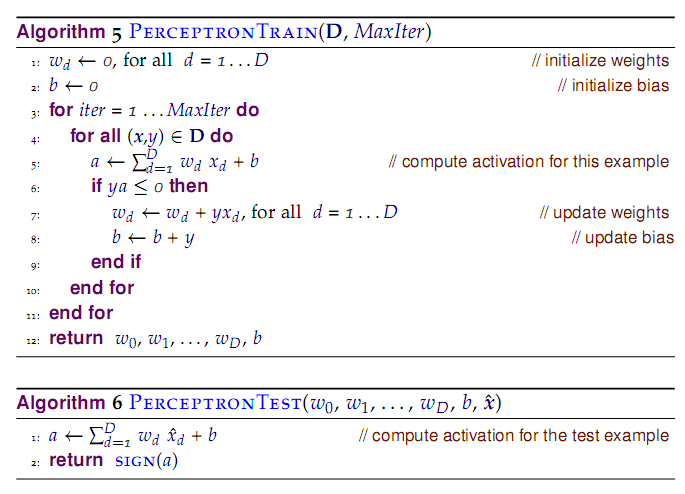

The algorithm is shown in the above image.

In [12]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [13]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

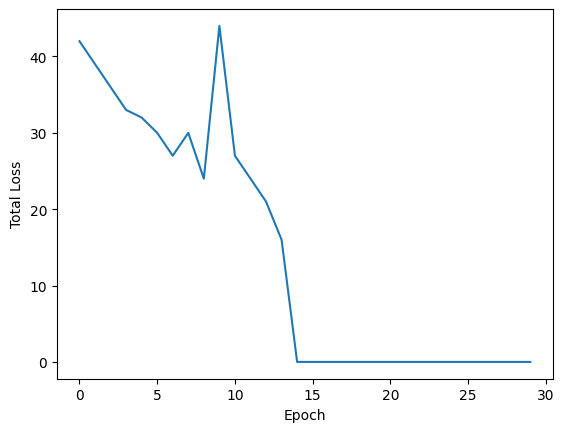

In [14]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

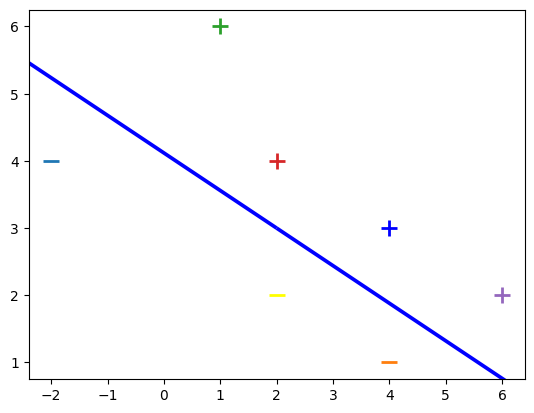

In [15]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [16]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [17]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


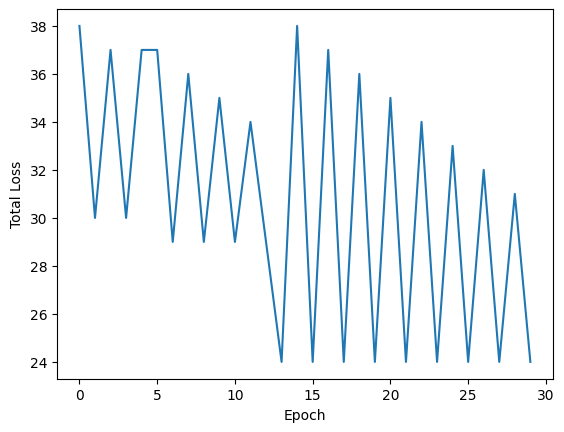

In [18]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [20]:
# Load the Sonar dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Sonar.csv"
data = pd.read_csv(url)

In [21]:
# Assuming the last column is the target variable (class) and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [22]:
# Assuming you have some model that predicts probabilities or scores
# Let's generate some random predictions as an example
np.random.seed(42)
predictions = np.random.rand(len(y))

In [23]:
# Calculate errors or differences between predictions and actual values
errors = np.abs(predictions - y)

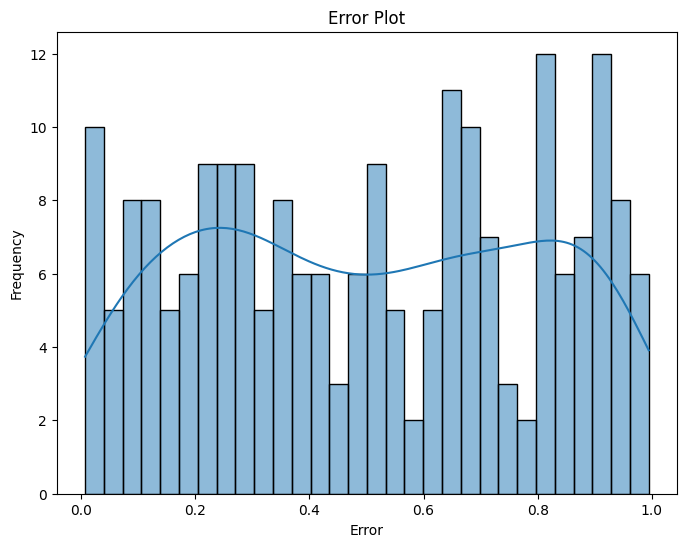

In [24]:
# Create an error plot using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Plot')
plt.show()

**question 2 **

In [33]:

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [28]:
def gradient_descent(X, y, learning_rate, n_iterations):
    m = len(y)
    theta = np.random.randn(2,1)
    X_b = np.c_[np.ones((m, 1)), X]
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

In [29]:
def plot_gradient_descent(X, y, theta):
    plt.scatter(X, y)
    plt.plot(X, X*theta[1] + theta[0], 'r')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Gradient Descent Fit')
    plt.show()

In [30]:
learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5]

Learning Rate: 0.01, Theta: [3.67753775 3.1541965 ]


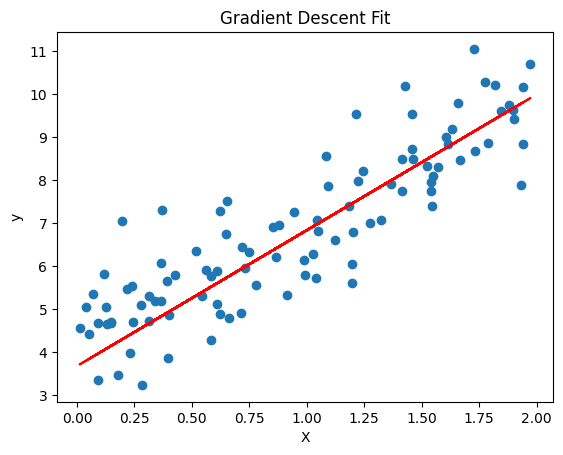

Learning Rate: 0.1, Theta: [4.19236174 2.79018664]


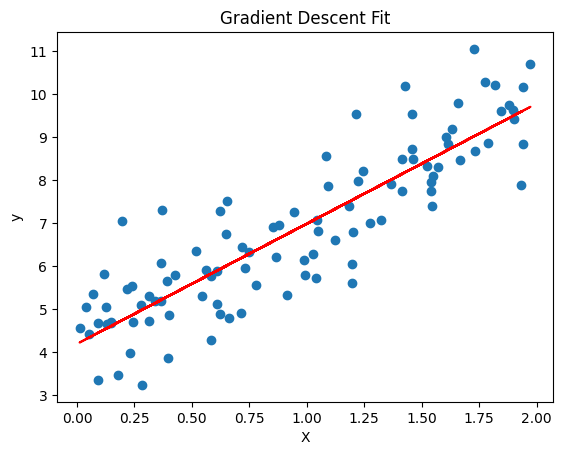

Learning Rate: 0.5, Theta: [-1625.05423271 -1842.49560344]


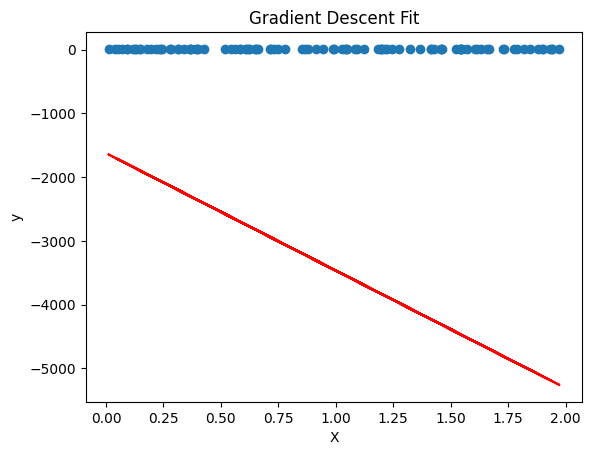

Learning Rate: 1.0, Theta: [-1.34485328e+50 -1.52314390e+50]


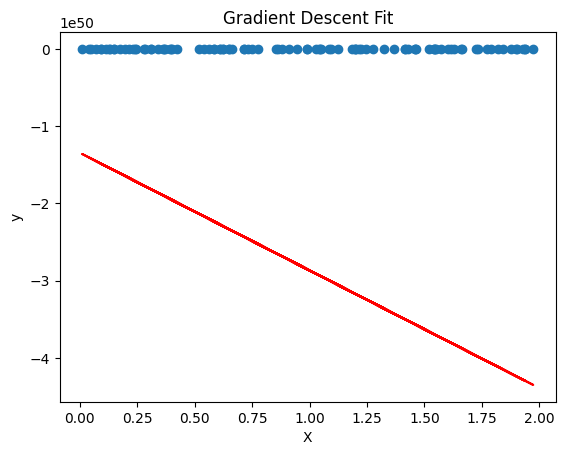

Learning Rate: 1.5, Theta: [-1.07063034e+72 -1.21256653e+72]


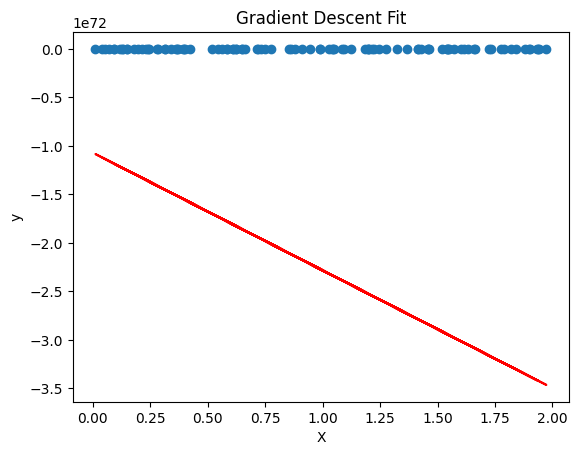

In [31]:
for rate in learning_rates:
    theta = gradient_descent(X, y, learning_rate=rate, n_iterations=100)
    print(f"Learning Rate: {rate}, Theta: {theta.flatten()}")
    plot_gradient_descent(X, y, theta)

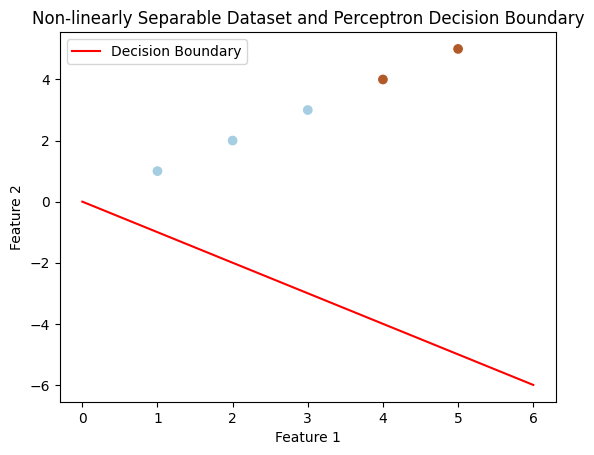

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Non-linearly separable dataset
X_non_linear = np.array([
    [1, 1],
    [2, 2],
    [3, 3],
    [4, 4],
    [5, 5]
])
y_non_linear = np.array([-1, -1, -1, 1, 1])

# Perceptron algorithm
def perceptron_algorithm(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

# Run perceptron algorithm on non-linearly separable dataset
w_non_linear = perceptron_algorithm(X_non_linear, y_non_linear)

# Plot the dataset and decision boundary
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, marker='o', cmap=plt.cm.Paired)

# Plot the decision boundary (line)
x_decision = np.linspace(0, 6, 100)
y_decision = -(w_non_linear[0] * x_decision) / w_non_linear[1]  # Corrected indexing
plt.plot(x_decision, y_decision, '-r', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-linearly Separable Dataset and Perceptron Decision Boundary')
plt.legend()
plt.show()
